In [1]:
import sys
sys.path.append('..')

import os
import numpy as np
import helpers as h
import cv2 as cv
from matplotlib import pyplot as plt
import random as rng

In [2]:
input_img = cv.imread('../data/label_help/ACel/009.png')
label_img = cv.imread('../dataset_pericardium_manual/label/ACel/009.png')

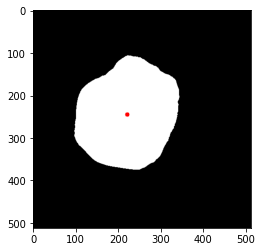

In [3]:
# Find centroid of image

def centroid(img):
    M = cv.moments(img[:,:,1])
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    return (cX, cY)

img = label_img.copy()
cv.circle(img, centroid(img), 5, (255, 0, 0), -1)

plt.imshow(img)

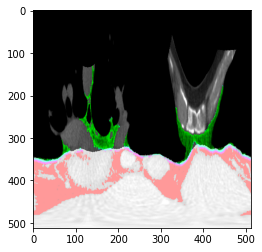

In [4]:
def to_polar(input_img, label_img):
    input_img = input_img.astype(np.float32)
    value = np.sqrt(((input_img.shape[0]/2.0)**2.0)+((input_img.shape[1]/2.0)**2.0))
    polar_image = cv.linearPolar(input_img, centroid(label_img), value, cv.WARP_FILL_OUTLIERS)
    polar_image = polar_image.astype(np.uint8)
    polar_image = cv.rotate(polar_image, cv.ROTATE_90_COUNTERCLOCKWISE)
    return polar_image

plt.imshow(cv.cvtColor(to_polar(input_img, label_img), cv.COLOR_BGR2RGB))

In [12]:
all_images = h.listdir('../data/label_help/ACel/')
all_labels = h.listdir('../dataset_pericardium_manual/label/ACel/')

images = []

for file_name in all_labels:
    input_img = cv.imread('../data/label_help/ACel/' + file_name)
    label_img = cv.imread('../dataset_pericardium_manual/label/ACel/' + file_name)
    # skip empty labels
    if label_img.sum() < 0.1:
        continue
    images.append(to_polar(label_img, label_img))
    
print(len(images))

34


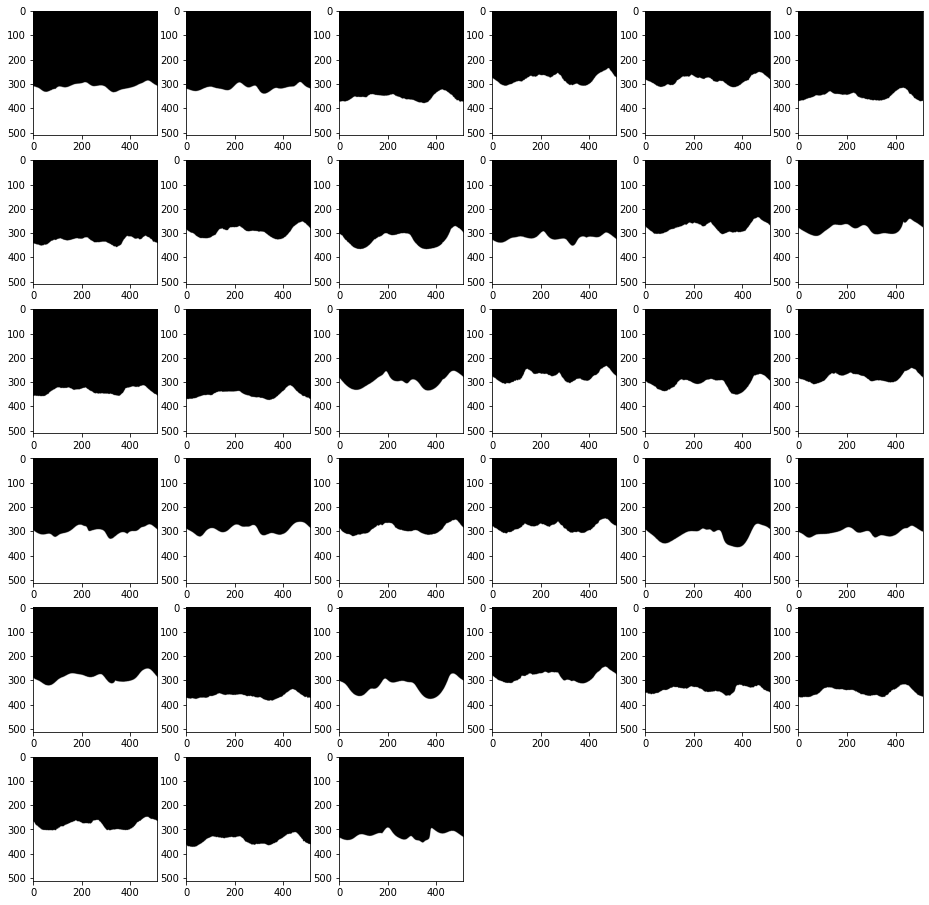

In [13]:
fig = plt.figure(figsize=(16, 16))
columns = 6
rows = 6
for i in range(1, columns*rows +1):
    if i >= len(images):
        break
    img = images[i]
    ax = fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [17]:
ORIGINAL_DATASET = '../dataset_pericardium_manual/'
POLAR_DATASET = '../dataset_pericardium_manual_polar/'

patients = h.listdir(ORIGINAL_DATASET + 'input/')
patients.sort()
for patient in patients:
    h.mkdir(POLAR_DATASET + 'input/' + patient)
    h.mkdir(POLAR_DATASET + 'label/' + patient)

    patient_inputs = h.listdir(ORIGINAL_DATASET + 'input/' + patient)
    patient_inputs.sort()
    patient_labels = h.listdir(ORIGINAL_DATASET + 'input/' + patient)
    patient_labels.sort()

    for file_name in patient_labels:
        input_img = cv.imread(ORIGINAL_DATASET + 'input/' + patient + '/' + file_name)
        label_img = cv.imread(ORIGINAL_DATASET + 'label/' + patient + '/' + file_name)
        
        if label_img.sum() < 0.1:
            input_polar = input_img
            label_polar = label_img
        else:
            input_polar = to_polar(input_img, label_img)
            label_polar = to_polar(label_img, label_img)
            
        cv.imwrite(POLAR_DATASET + 'input/' + patient + '/' + file_name, input_polar)
        cv.imwrite(POLAR_DATASET + 'label/' + patient + '/' + file_name, label_polar)

In [26]:
ORIGINAL_DATASET = '../dataset_dicom/'
POLAR_DATASET = '../dataset_dicom_polar/'

patients = h.listdir(ORIGINAL_DATASET + 'input/')
patients.sort()
for patient in patients:
    h.mkdir(POLAR_DATASET + 'input/' + patient)
    h.mkdir(POLAR_DATASET + 'label/' + patient)

    patient_inputs = h.listdir(ORIGINAL_DATASET + 'input/' + patient)
    patient_inputs.sort()
    patient_labels = h.listdir(ORIGINAL_DATASET + 'input/' + patient)
    patient_labels.sort()

    for file_name in patient_labels:
        input_img = cv.imread(ORIGINAL_DATASET + 'input/' + patient + '/' + file_name)
        label_img = cv.imread(ORIGINAL_DATASET + 'label/' + patient + '/' + file_name)

        if label_img is None:
            print(patient, file_name)

        if label_img.sum() < 0.1:
            input_polar = input_img
            label_polar = label_img
        else:
            input_polar = to_polar(input_img, label_img)
            label_polar = to_polar(label_img, label_img)
            
        cv.imwrite(POLAR_DATASET + 'input/' + patient + '/' + file_name, input_polar)
        cv.imwrite(POLAR_DATASET + 'label/' + patient + '/' + file_name, label_polar)

In [ ]:
ORIGINAL_DATASET = '../dataset_pericardium_manual/'
ORIGINAL_EAT = '../data/gt_eat/'
POLAR_EAR = '../gt_eat_polar/'

patients = h.listdir(ORIGINAL_DATASET + 'input/')
patients.sort()
for patient in patients:
    h.mkdir(POLAR_LABELS + patient)

    patient_labels = h.listdir(ORIGINAL_EAT + patient)
    patient_labels.sort()

    for file_name in patient_labels:
        eat_img = cv.imread(ORIGINAL_EAT + patient + '/' + file_name)
        label_img = cv.imread(ORIGINAL_DATASET + 'label/' + patient + '/' + file_name)

        if label_img is None:
            print(patient, file_name)

        if eat_img.sum() < 0.1:
            eat_polar = eat_img
        else:
            eat_polar = to_polar(eat_img, label_img)
            
        cv.imwrite(POLAR_DATASET + 'input/' + patient + '/' + file_name, input_polar)
        cv.imwrite(POLAR_DATASET + 'label/' + patient + '/' + file_name, label_polar)